In [2]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib as plt

/var/folders/nr/sg4pg7nx3n9cqvgblg0xxm3h0000gn/T/ipykernel_11328/2003324747.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download("AAPL", start="2018-01-01", end="2024-01-01")
[*********************100%***********************]  1 of 1 completed



Cumulative return: 22.9 %
Annualised return: 8.37 %
Annualised volatility: 31.4 %
Sharpe ratio: 0.27


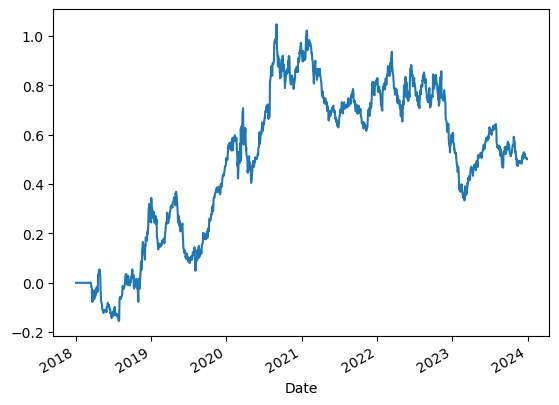

In [3]:
df = yf.download("AAPL", start="2018-01-01", end="2024-01-01")
df = df[["Close"]].copy()

df["SMA_fast"] = df["Close"].rolling(window=20).mean()
df["SMA_slow"] = df["Close"].rolling(window=50).mean()

df["signal"] = 0
df.loc[df["SMA_fast"] > df["SMA_slow"], "signal"] = 1
df.loc[df["SMA_fast"] < df["SMA_slow"], "signal"] = -1

df["position"] = df["signal"].shift(1)

df["returns"] = df["Close"].pct_change()
df["strategy_returns"] = df["returns"] * df["position"]

total = df["strategy_returns"].cumsum().plot()

cumulative = (1 + df["strategy_returns"].dropna()).prod() - 1
annualised = df["strategy_returns"].mean() * 252
vol = df["strategy_returns"].std() * np.sqrt(252)
sharpe = annualised / vol

print("")
print("Cumulative return:", round(cumulative * 100, 2), "%")
print("Annualised return:", round(annualised * 100, 2), "%")
print("Annualised volatility:", round(vol * 100, 2), "%")
print("Sharpe ratio:", round(sharpe, 2))